In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class MLP(object):
    
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.l1 = Layer(input_dim     = input_dim,
                                   output_dim = hidden_dim,
                                   activation    = self.sigmoid,
                                   dactivation     = self.dsigmoid)
        self.l2 = Layer(input_dim     = hidden_dim,
                                   output_dim = output_dim,
                                   activation    = self.sigmoid,
                                   dactivation     = self.dsigmoid)
        self.layers = [self.l1, self.l2]
        
    def __call__(self, x):
        return self.forward(x)
        
    def forward(self, x):
        h = self.l1(x)
        y = self.l2(h)
        return y
    
    def sigmoid(self, x):
        return 1 / (1+np.exp(-x))
    
    def dsigmoid(self, x):
        return self.sigmoid(x) * (1- self.sigmoid(x))
    
    def compute_loss(self, t, y):
         return (-t * np.log(y) - (1-t) * np.log(1-y)).sum()
        
    def train_step(self, x, t):
        y = self(x)
        
        for i, layer in enumerate(self.layers[::-1]):
            if i == 0:
                delta = y-t
            else:
                delta = layer.backward(delta, W)
        
            dW, db = layer.compute_gradients(delta)
            layer.W = layer.W - 0.1 * dW
            layer.b = layer.b - 0.1 * db
        
            W = layer.W
        loss = self.compute_loss(t, y)
        return loss
        

In [3]:
class Layer(object):
    def __init__(self, input_dim, output_dim, activation, dactivation):
        self.W = np.random.normal(size=(input_dim, output_dim))
        self.b = np.zeros(output_dim)
        
        self.activation = activation
        self.dactivation = dactivation
    
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        self._input = x
        self._pre_activation = np.matmul(x, self.W) + self.b
        return self.activation(self._pre_activation)
    
    def backward(self, delta, W):
        delta = self.dactivation(self._pre_activation) * np.matmul(delta, W.T)
        return delta
    
    def compute_gradients(self, delta):
        dW = np.matmul(self._input.T, delta)
        db = np.matmul(np.ones(self._input.shape[0]), delta)
        return dW, db

In [4]:
x = np.array([[0,0], [0,1], [1,0], [1,1]])
t = np.array([[0], [1], [1], [0]])

In [13]:
model = MLP(2, 2, 1)

In [16]:
epochs = 10000

for epoch in range(epochs):
    train_loss = model.train_step(x, t)
    if epoch % 1000 == 0 or epoch == epochs-1:
        print('epoch:{}, loss:{:.3f}'.format(epoch+1, train_loss))

epoch:1, loss:0.010
epoch:1001, loss:0.009
epoch:2001, loss:0.008
epoch:3001, loss:0.008
epoch:4001, loss:0.007
epoch:5001, loss:0.006
epoch:6001, loss:0.006
epoch:7001, loss:0.006
epoch:8001, loss:0.005
epoch:9001, loss:0.005
epoch:10000, loss:0.005


In [17]:
for input in x:
    print('{} => {:.3f}'.format(input, model(input)[0]))

[0 0] => 0.001
[0 1] => 0.999
[1 0] => 0.998
[1 1] => 0.001


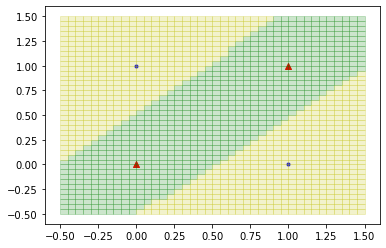

In [18]:
plt.scatter(x[3, 0],x[3, 1],marker='^', color='r')
plt.scatter(x[2, 0],x[2, 1],marker='.', color='b')
plt.scatter(x[1, 0],x[1, 1],marker='.', color='b')
plt.scatter(x[0, 0],x[0, 1],marker='^', color='r')
for i in range(40):
    for j in range(40):
        x_ = np.array([(i-10)*0.05, (j-10)*0.05])
        if model(x_) > 0.5:
            plt.fill([x_[0], x_[0], x_[0]+0.05, x_[0]+0.05], [x_[1], x_[1]+0.05, x_[1]+0.05, x_[1]],color="y",alpha=0.2)
        else:
             plt.fill([x_[0], x_[0], x_[0]+0.05, x_[0]+0.05], [x_[1], x_[1]+0.05, x_[1]+0.05, x_[1]],color="g",alpha=0.2)
plt.show()